# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [2]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [3]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [1]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  548.573 ms (2 allocations: 32.00 MiB)


In [4]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed Libmount_jll ───────────────── v2.40.2+0
   Installed LERC_jll ───────────────────── v4.0.0+0
   Installed GR_jll ─────────────────────── v0.73.8+0
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed JpegTurbo_jll ──────────────── v3.0.4+0
   Installed LoggingExtras ──────────────── v1.1.0
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed Unitful ────────────────────── v1.21.1
   Installed Contour ────────────────────── v0.6.3
   Installed Grisu ──────────────────────── v1.0.2
   Installed ConcurrentUtilities ────────── v2.4.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg

LoadError: syntax: incomplete: "for" at In[10]:29 requires end

In [129]:
function myMPCSegwaySpeedController(A, B, xk, xGoal)
    # Prediction horizon (shorter than Task 3)
    nConHoriz = 5  # Can adjust between 5 and 20 for better trade-off between responsiveness and stability

    # Compute S and M matrices for the horizon
    S = A^nConHoriz
    M = Array{Float64, 2}(undef, size(A, 1), nConHoriz)
    for k = 1:nConHoriz
        M[:, k] = A^(nConHoriz - k) * B
    end

    # Selection matrix C to exclude base position (x2)
    # Focusing on lean angle (x1), angular velocity (x3), and base velocity (x4)
    C = [1 0 0 0; 0 0 1 0; 0 0 0 1]

    # Reduced matrices for MPC computation
    CS = C * S
    CM = C * M

    # Regularization term for smoother control
    R = 0.001 * I(nConHoriz)  # Penalize large control inputs for smoother behavior

    # Solve the weighted least-squares problem for control inputs
    rhs = xGoal - CS * xk
    uControl = (CM' * CM + R) \ (CM' * rhs)

    # Limit control inputs for safety and stability
    max_control = 30.0  # Adjust to ensure reasonable control inputs
    uControl = clamp.(uControl, -max_control, max_control)

    # Return the first control input
    return uControl[1]
end

myMPCSegwaySpeedController (generic function with 1 method)

Your maximum lean angle was 9.119842008591192 degrees and you met the specifiction! Bravo!


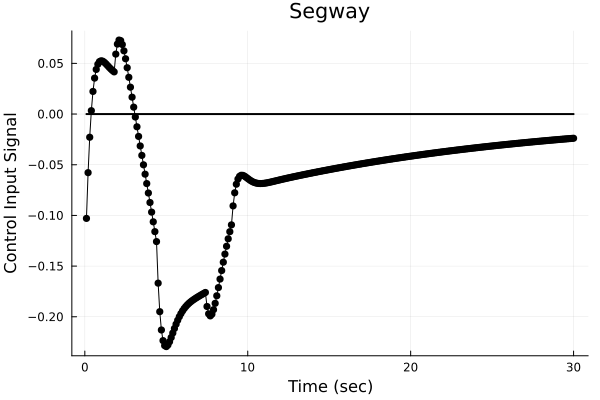

In [130]:
function simSegwayMPCspeed(x0,N,xGoal)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=myMPCSegwaySpeedController(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        xkp1 = xkPlus1Disturbed(A,B,xk,uk,dt)
        xTraj = [xTraj xkp1]
    end
    return xTraj, uTraj
end

x0=[0;0;0;.9]

#=
We gave you the goal
x1Goal x3Goal x4Goal
=#
xGoal = [0;0;1.0]

# 30 seconds
N=300

(xTrajMPC, uTrajMPC) = simSegwayMPCspeed(x0,N,xGoal)

maxLeanAngle=maximum(abs.(xTrajMPC[1,:]*180/pi)) + 6

if (maxLeanAngle > 35)
    println("Your maximum lean angle was $maxLeanAngle degrees and exceeded the tolerance. Go back and fix your controller")
else
    println("Your maximum lean angle was $maxLeanAngle degrees and you met the specifiction! Bravo!")
end

titre="Segway"
t=(1:N)*dt
p20=plot(t,uTrajMPC',legend=false, title=titre, color=:black, linewidth=1 )
scatter!(t,uTrajMPC',legend=false, title=titre, color=:black)
xlabel!("Time (sec)");ylabel!("Control Input Signal")
plot!(t,0.0*uTrajMPC',linewidth=2, color=:black)
p20

norm(xTrajMPC[4:4, :] - refV) = 3.6177668374164123


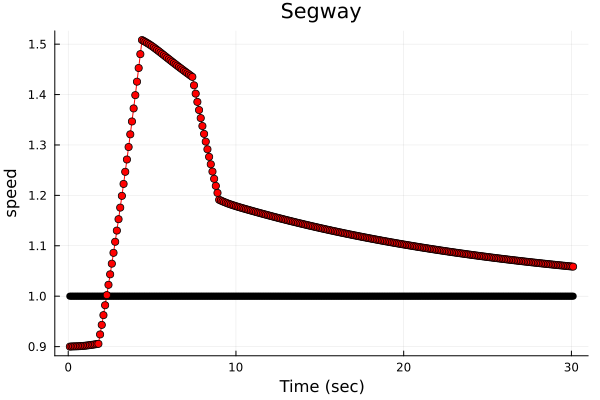

In [131]:
refV=ones(1,N+1)
@show norm(xTrajMPC[4:4,:]-refV)

t=(1:N+1)*dt
p22=plot(t,xTrajMPC[4,:],legend=false, title=titre, color=:red )
scatter!(t,refV',legend=false, title=titre, color=:black)
scatter!(t,xTrajMPC[4,:],legend=false, title=titre, color=:red )
xlabel!("Time (sec)");ylabel!("speed")
p22

In [132]:
function simSegwayMPCspeedTest(x0,N,xGoal)
    (A,B)=SegwayModel()
    (rA,cA) = size(A)
    xTraj = Array{Float64,2}(undef,rA,0)
    uTraj = Array{Float64,2}(undef,1,0)
    xTraj=[xTraj x0]
    for k = 1:N
        xk=xTraj[:,k]
        uk=myMPCSegwaySpeedController(A,B,xk,xGoal)
        uTraj=[uTraj uk]
        if k==70
            xk[3]=1.8
        elseif k==150
            xk[4]=xk[4]-0.05
        elseif k==200
            xk=xk-8*[0.05;0;-0.2;0.0]
        end
        xkp1 = A*xk+B*uk
        xTraj = [xTraj xkp1]
    end
    return xTraj, uTraj
end

x0=[0;0;0;.9]
xGoal = [0;0;1.0]
N=300
(xTrajMPC, uTrajMPC) = simSegwayMPCspeedTest(x0,N,xGoal)

maxLeanAngle=maximum(abs.(xTrajMPC[1,:]*180/pi))
println("Your maximum lean angle is $maxLeanAngle")

posTraj = xTrajMPC[2:2, :]
maxDisplacemnt = maximum(abs.(posTraj))

if maxDisplacemnt < 1
    T = N*dt
    println("Oh no! How can you roll at 1 m/s for $T seconds and not go anywhere?")
end

velTraj = xTrajMPC[4:4, :]
minVelocity = minimum(velTraj)
if minVelocity < 0
    println("Uh-oh! Your Segway was rolling backward at $minVelocity m/s.")
end


if (maxLeanAngle>30)||( maxDisplacemnt < 1)||(minVelocity<0)
    println("You need to go back and correct your function")
else
    println("Submit the Project and you're done with ROB 101. We wish you well in your other courses.")
end

Your maximum lean angle is 27.70624987102075
Submit the Project and you're done with ROB 101. We wish you well in your other courses.
